In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_cleaned.csv')
df.head(1)

,airline,embarked,destination,Route,stops,journey_year,journey_month,journey_day,weekday,dep_hour,...,departure_period,Arrival_hour,Arrival_min,arrival_period,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,2019,3,24,6,22,...,night,1,10,late night,True,2,50,170,3898,No info


In [4]:
cat_col=[column for column in df.columns if df[column].dtype=='object']
cat_col

['airline',
 'embarked',
 'destination',
 'Route',
 'stops',
 'departure_period',
 'arrival_period',
 'additional_info']

In [5]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['journey_year',
 'journey_month',
 'journey_day',
 'weekday',
 'dep_hour',
 'dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Arrived_next_day',
 'duration_hours',
 'duration_mins',
 'Duration_in_mins',
 'price']

In [7]:
categorical = df[cat_col]
categorical

,airline,embarked,destination,Route,stops,departure_period,arrival_period,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,night,late night,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,early morning,After noon,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,morning,late night,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,evening,night,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,After noon,night,No info
...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,evening,night,No info
10458,Air India,Kolkata,Banglore,CCU → BLR,non-stop,evening,night,No info
10459,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,early morning,morning,No info
10460,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,morning,After noon,No info


In [8]:
categorical['airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

In [9]:
Airline = pd.get_dummies(categorical['airline'],drop_first=True)

In [10]:
Embarked = pd.get_dummies(categorical['embarked'],drop_first=True)

In [11]:
Destination = pd.get_dummies(categorical['destination'],drop_first=True)

In [12]:
categorical = categorical.drop(['additional_info'], axis = 1)
categorical.head(1)

,airline,embarked,destination,Route,stops,departure_period,arrival_period
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,night,late night


In [13]:
categorical['stops'].replace({'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops':3, '4 stops':4}, inplace=True)
categorical.head(1)

,airline,embarked,destination,Route,stops,departure_period,arrival_period
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,night,late night


In [14]:
categorical = categorical.drop(['airline'], axis = 1)
categorical = categorical.drop(['embarked'], axis = 1)
categorical = categorical.drop(['destination'], axis = 1)
categorical = categorical.drop(['Route'], axis = 1)
categorical = categorical.drop(['departure_period'], axis = 1)
categorical = categorical.drop(['arrival_period'], axis = 1)

#categorical = categorical.drop(['Arrived_next_day'], axis = 1)

In [15]:
df_en = pd.concat([categorical,Airline,Embarked,Destination,df[continuous_col]],axis=1)

In [16]:
df_en.head()

,stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,weekday,dep_hour,dep_min,Arrival_hour,Arrival_min,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price
0,0,0,0,1,0,0,0,0,0,0,...,6,22,20,1,10,True,2,50,170,3898
1,2,1,0,0,0,0,0,0,0,0,...,2,5,50,13,15,False,7,25,445,7663
2,2,0,0,0,1,0,0,0,0,0,...,6,9,25,4,25,True,19,0,1140,13883
3,1,0,0,1,0,0,0,0,0,0,...,6,18,5,23,30,False,5,25,325,6219
4,1,0,0,1,0,0,0,0,0,0,...,4,16,50,21,35,False,4,45,285,13303


In [17]:
X= df_en.drop('price',axis=1)
y= df['price']

In [18]:
from sklearn.feature_selection import mutual_info_classif

In [19]:
mutual_info_classif(X,y)

array([2.16135105, 0.75125291, 0.10173396, 0.68971787, 0.92536699,
       0.01353277, 0.58028933, 0.01537146, 0.33077274, 0.        ,
       0.22592138, 0.        , 0.1729168 , 1.52723933, 0.88859408,
       0.27302829, 1.55353563, 0.41188293, 0.29424356, 0.19346141,
       0.38824566, 1.47761924, 1.30831014, 0.79318312, 0.70196175,
       1.40569639, 1.18407196, 1.82360523, 1.53782377, 0.83467018,
       1.76706535, 1.06718971, 2.33979635])

In [22]:
# Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency 
# between the variables. It is equal to zero if and only if two random variables are independent 
# and higher values mean higher dependency.
mic = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
mic.columns = ['dependency']
mic.sort_values(by='dependency',ascending=False)

,dependency
Duration_in_mins,2.329264
stops,2.125938
Arrival_hour,1.880570
duration_hours,1.762716
Arrival_min,1.532826
Delhi,1.526385
Cochin,1.514265
journey_year,1.490404
dep_hour,1.406153
journey_month,1.221112


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

Model is: LogisticRegression()
Training score: 0.07276855060341737
Predictions are: [10845  3944 19226 ... 14782  4805 10263]


r2 score is: 0.14962685826025146
MAE:2740.136645962733
MSE:15953590.894409938
RMSE:3994.1946490387695


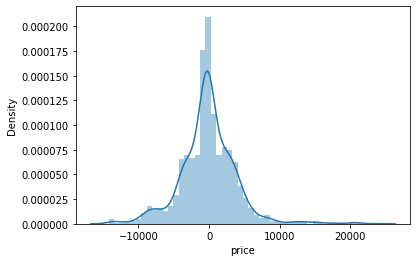

In [25]:
from sklearn.linear_model import LogisticRegression
predict(LogisticRegression())